## PHASE 3 
# Final Project Submission

* Student name: Titus Mutuku
* Student pace: Full Time Online 
* Moringa School
* November 2023 

# Chicago Car Crash: Predicting the Cause of Traffic Accidents 

## Overview of the Project

* I undertook a comprehensive data analysis project focused on building inferential classification models for the Vehicle Safety Board of Chicago based on crash data. I initiated by cleaning and formatting the data provided by the City of Chicago, which includes information on crashes, vehicles, and people involved in crashes in 2023.
* The objective of the project was to model the primary contributory causes of car accidents, classifying them into two categories. This implies a binary classification problem where my goal was to predict whether a crash is preventable or not.
* I adopted an iterative modeling approach, trying out multiple classification models to assess their performance. I explored various models for binary classification, such as Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Neural Networks.
* The models aimed to identify factors or features contributing to preventable crashes, providing valuable insights into the root causes of accidents and suggesting targeted interventions.
* Recommendations derived from my analysis include investing in driver education for certain age groups and addressing specific road conditions that could lead to a crash. These recommendations aim to enhance road safety and mitigate the occurrence of preventable accidents.

## Business Problem

* In this Project, the central focus revolves around addressing a critical dilemma faced by the Vehicle Safety Board of Chicago—specifically, the optimal allocation of resources between drivers' education and road infrastructure improvements to curtail the occurrence of preventable crashes. To tackle this multifaceted challenge, a comprehensive analysis is undertaken, drawing insights from historical crash data in 2023.
* The initial steps involve meticulously collecting and cleansing data obtained from the City of Chicago records. This process ensures the integrity of the dataset, encompassing details on crashes, involved vehicles, and individuals. The dataset is delved into, conducting exploratory analyses to discern patterns related to preventable and non-preventable crashes. Additionally, feature engineering is employed to identify pertinent variables—such as weather conditions, time of day, and driver demographics—that could significantly influence the preventability of crashes.
* With a refined dataset in hand, an iterative modeling approach is adopted, experimenting with a range of classification algorithms including Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Neural Networks. The objective is to assess the performance of these models, employing metrics such as accuracy, precision, recall, and F1-score to gauge their effectiveness.
* Following model selection, the project proceeds with training and testing phases, fine-tuning hyperparameters, and evaluating the models' ability to generalize to new, unseen data. As interpretability is paramount, the models are enhanced to provide clear insights into the factors influencing crash preventability. Key findings are identified, shedding light on the features that contribute significantly to preventable crashes.
* Armed with these insights, evidence-based recommendations are presented to the Vehicle Safety Board. These recommendations delineate the expected impact of investing in drivers' education programs versus road infrastructure improvements in mitigating the occurrence of preventable crashes. The validation phase ensures the robustness of the models, with iterative adjustments made based on stakeholder feedback and additional data.
* In the final stage, the findings, insights, and recommendations are communicated to the Vehicle Safety Board in a comprehensible and actionable manner. The ultimate goal of this project is to empower the board with informed decision-making tools, facilitating the reduction of preventable crashes in Chicago through strategic resource allocation.

## Import Packages 

In [88]:
#!pip install scikit-learn

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

import folium 

import warnings
warnings.filterwarnings('ignore')

## The Functions to Use 

In [89]:
def evaluate_classification(model, X_train_tf, X_test_tf, y_train, y_test, classes = None, 
                            normalize = 'true', cmap='summer', label = ''):
    
    """Input a model, training data and test data to return sklearn metrics
        - Classification Report for training and test 
        - Confusion Matrix for training and test 
        - ROC Curve for training and test 
        
        Args:
        model: instantiated classifier (ex: LogisticRegression = log_reg)
        X_train_tf: train_test_split & preprocessed
        X_test_tf: train_test_split & preprocessed
        y_train: train_test_split
        y_test: train_test_split 
        label: optional label for type of test 
        
        Modified Function, Citation:
        https://github.com/jirvingphd/fsds_070620_FT_cohort_notes/blob/master/Mod_3/
        mod_3_classification_project/bonus%20notebooks/classification_project_OH1_pipelines_SHAP%20.ipynb
        
    """
    # retrieve predictions for train and test data 
    y_pred_train = model.predict(X_train_tf)
    y_pred_test = model.predict(X_test_tf)
    
    # print training classification report 
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names = classes))
    
    # display training figures 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # confusion matrix 
    plot_confusion_matrix(model, X_train_tf, y_train, labels=classes, normalize = normalize,
                         cmap = cmap, ax=axes[0])
    
    axes[0].set(title = 'Confusion Matrix Training')
    
    # plot ROC curve 
    plot_roc_curve(model, X_train_tf, y_train, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Training')
    plt.show()
    
    # print testing classification report 
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names = classes))
    
    # display training figures 
    fig, axes = plt.subplots(figsize=(10,4), ncols=2)
    
    # confusion matrix 
    plot_confusion_matrix(model, X_test_tf, y_test,  labels=classes, normalize = normalize, 
                          cmap = cmap, ax=axes[0])
  
    
    axes[0].set(title = 'Confusion Matrix Testing')
    
    # plot ROC curve 
    plot_roc_curve(model, X_test_tf, y_test, ax=axes[1])
    roc = axes[1]
    roc.legend()
    roc.plot([0,1], [0,1], ls=':')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Test')
    plt.show()

## Importing the Data

### Data Source (3 of them)

In [ ]:
#Import all the three databases 
crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
people =pd.read_csv('Traffic_Crashes_-_People.csv')

### Merging the Datasets

In [112]:
# import database one and observe 
pd.set_option('display.max_columns', None)
crash = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv')
vehicle = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv')
person = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv')

In [4]:
df.to_csv()

',crash_record_id_x,crash_date_est_i,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,crash_date_y,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,ex

# Data Cleaning

## Calculating Nulls

In [5]:
# calculating nulls
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
crash_date_est_i,0.926129
lane_cnt,1.000000
report_type,0.021888
intersection_related_i,0.701094
private_property_i,0.969904
hit_and_run_i,0.718878
photos_taken_i,0.995896
statements_taken_i,0.945280
dooring_i,0.984952
work_zone_i,0.997948


In [6]:
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label

['crash_date_est_i',
 'lane_cnt',
 'intersection_related_i',
 'private_property_i',
 'hit_and_run_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i',
 'work_zone_i',
 'work_zone_type',
 'workers_present_i',
 'num_passengers',
 'cmrc_veh_i',
 'towed_i',
 'fire_i',
 'exceed_speed_limit_i',
 'towed_by',
 'towed_to',
 'area_00_i',
 'area_01_i',
 'area_02_i',
 'area_03_i',
 'area_04_i',
 'area_05_i',
 'area_06_i',
 'area_07_i',
 'area_08_i',
 'area_09_i',
 'area_10_i',
 'area_11_i',
 'area_12_i',
 'area_99_i',
 'cmv_id',
 'usdot_no',
 'ccmc_no',
 'ilcc_no',
 'commercial_src',
 'gvwr',
 'carrier_name',
 'carrier_state',
 'carrier_city',
 'hazmat_placards_i',
 'hazmat_name',
 'un_no',
 'hazmat_present_i',
 'hazmat_report_i',
 'hazmat_report_no',
 'mcs_report_i',
 'mcs_report_no',
 'hazmat_vio_cause_crash_i',
 'mcs_vio_cause_crash_i',
 'idot_permit_no',
 'wide_load_i',
 'trailer1_width',
 'trailer2_width',
 'trailer1_length',
 'trailer2_length',
 'total_vehicle_length',
 'axle_cnt',
 '

## Dropping Columns w/ Excessive Nulls

In [7]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
display(df.head())
df.info()

(1462, 75)


,crash_record_id_x,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,crash_date_y,unit_no,unit_type,vehicle_id,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point,person_id,person_type,crash_record_id_y,crash_date,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,060ecd0e6925f19aed51fea3adef98de6c7f0435266ad1...,2023-11-29T22:35:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",2023-11-29T23:30:00.000,ANIMAL,ANIMAL,6212,N,CENTRAL AVE,1621,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,4,11,41.994793,-87.764870,POINT (-87.764870068078 41.994793477936),1712787,2023-11-29T22:35:00.000,1,DRIVER,1630387.0,CHEVROLET,MALIBU,IL,2015.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER,O1712787,DRIVER,060ecd0e6925f19aed51fea3adef98de6c7f0435266ad1...,2023-11-29T22:35:00.000,CHICAGO,IL,60660.0,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
1,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,2023-11-29T21:26:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-11-29T21:26:00.000,DISREGARDING STOP SIGN,NOT APPLICABLE,331,E,42ND ST,213,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,21,4,11,41.818300,-87.618471,POINT (-87.618470525334 41.818300049741),1712758,2023-11-29T21:26:00.000,1,DRIVER,1630360.0,JEEP,CHEROKEE,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER,O1712758,DRIVER,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,2023-11-29T21:26:00.000,CHICAGO,IL,60609.0,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
2,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,2023-11-29T21:26:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",2023-11-29T21:26:00.000,DISREGARDING STOP SIGN,NOT APPLICABLE,331,E,42ND ST,213,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,21,4,11,41.818300,-87.618471,POINT (-87.618470525334 41.818300049741),1712759,2023-11-29T21:26:00.000,2,DRIVER,1630367.0,INFINITI,QX70,IL,NaN,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT,O1712759,DRIVER,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,2023-11-29T21:26:00.000,CHICAGO,IL,60653.0,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
3,0d5762f18f3ad42d2465dbe2d8082b86543a3446e191a8...,2023-11-29T21:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",2023-11-29T21:05:00.000,UNABLE TO DETERMINE,UNABLE TO DETERMINE,501,W,63RD ST,722,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,21,4,11,41.779757,-87.637560,PO

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id_x              1462 non-null   object 
 1   crash_date_x                   1462 non-null   object 
 2   posted_speed_limit             1462 non-null   int64  
 3   traffic_control_device         1462 non-null   object 
 4   device_condition               1462 non-null   object 
 5   weather_condition              1462 non-null   object 
 6   lighting_condition             1462 non-null   object 
 7   first_crash_type               1462 non-null   object 
 8   trafficway_type                1462 non-null   object 
 9   alignment                      1462 non-null   object 
 10  roadway_surface_cond           1462 non-null   object 
 11  road_defect                    1462 non-null   object 
 12  report_type                    1430 non-null   o

## Dropping Irrelevant Columns 

In [8]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
drop = ['report_type', 'crash_type', 'damage', 'date_police_notified', 'injuries_fatal', 
        'injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_date',
        'crash_date', 'ejection','injury_classification']

df = df.drop(columns = drop)
print(df.shape)
df.head()

(1462, 61)


,crash_record_id_x,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,injuries_total,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,crash_date_y,unit_no,unit_type,vehicle_id,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point,person_id,person_type,crash_record_id_y,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,060ecd0e6925f19aed51fea3adef98de6c7f0435266ad1...,2023-11-29T22:35:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ANIMAL,ANIMAL,6212,N,CENTRAL AVE,1621,1,0.0,22,4,11,41.994793,-87.764870,POINT (-87.764870068078 41.994793477936),1712787,2023-11-29T22:35:00.000,1,DRIVER,1630387.0,CHEVROLET,MALIBU,IL,2015.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER,O1712787,DRIVER,060ecd0e6925f19aed51fea3adef98de6c7f0435266ad1...,CHICAGO,IL,60660.0,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
1,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,2023-11-29T21:26:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,DISREGARDING STOP SIGN,NOT APPLICABLE,331,E,42ND ST,213,2,0.0,21,4,11,41.818300,-87.618471,POINT (-87.618470525334 41.818300049741),1712758,2023-11-29T21:26:00.000,1,DRIVER,1630360.0,JEEP,CHEROKEE,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER,O1712758,DRIVER,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,CHICAGO,IL,60609.0,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
2,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,2023-11-29T21:26:00.000,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,DISREGARDING STOP SIGN,NOT APPLICABLE,331,E,42ND ST,213,2,0.0,21,4,11,41.818300,-87.618471,POINT (-87.618470525334 41.818300049741),1712759,2023-11-29T21:26:00.000,2,DRIVER,1630367.0,INFINITI,QX70,IL,NaN,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT,O1712759,DRIVER,53c6436e125c9d48ad67d47256b686f4c8ea34da9524ce...,CHICAGO,IL,60653.0,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
3,0d5762f18f3ad42d2465dbe2d8082b86543a3446e191a8...,2023-11-29T21:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,501,W,63RD ST,722,2,0.0,21,4,11,41.779757,-87.637560,POINT (-87.637560420774 41.779757412057),1712750,2023-11-29T21:05:00.000,1,DRIVER,1630350.0,CHEVROLET,EQUINOX,IL,2007.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),UNKNOWN/NA,E,STRAIGHT AHEAD,2.0,FRONT,O1712750,DRIVER,0d5762f18f3ad42d2465dbe2d8082b86543a3446e191a8...,NaN,NaN,NaN,M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
4,0d5762f18f3ad42d2465dbe2d8082b86543a3446e191a8...,2023-11-29T21:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,501,W,63RD ST,722,2,0.0,21,4,11,41.779757,-87.637560,POINT (-87.637560420774 41.779757412057),1712750,2023-11-29T21:05:00.000,1,DRIVER,1630350.0,CHEVROLET,EQUINOX,IL,2007.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),UNKNOWN/NA,E,STRAIGHT AHEAD,2.0,FRONT,P378860,PASSENGER,0d5762f18f3ad42d2465db

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crash_record_id_x        1462 non-null   object 
 1   crash_date_x             1462 non-null   object 
 2   posted_speed_limit       1462 non-null   int64  
 3   traffic_control_device   1462 non-null   object 
 4   device_condition         1462 non-null   object 
 5   weather_condition        1462 non-null   object 
 6   lighting_condition       1462 non-null   object 
 7   first_crash_type         1462 non-null   object 
 8   trafficway_type          1462 non-null   object 
 9   alignment                1462 non-null   object 
 10  roadway_surface_cond     1462 non-null   object 
 11  road_defect              1462 non-null   object 
 12  prim_contributory_cause  1462 non-null   object 
 13  sec_contributory_cause   1462 non-null   object 
 14  street_no               

## Dropping Redundant Columns

In [12]:
# dropping redundant columns, previewing shape, data and info 
drop = ['crash_record_id_x', 'crash_date_x', 'alignment', 'sec_contributory_cause',
        'num_units','crash_unit_id', 'vehicle_id', 'person_id', "crash_record_id_y", 'street_no', 'street_direction',
       'street_name', 'location', 'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no',
       'model', 'vehicle_year', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point',
       'lic_plate_state', 'city']
df = df.drop(columns=drop)
print(df.shape)
display(df.head())
df.info()

(1462, 33)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,prim_contributory_cause,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,DRY,NO DEFECTS,ANIMAL,1621,0.0,22,4,DRIVER,CHEVROLET,NONE,PASSENGER,DRIVER,IL,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
1,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,DISREGARDING STOP SIGN,213,0.0,21,4,DRIVER,JEEP,UNKNOWN,PASSENGER,DRIVER,IL,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,DISREGARDING STOP SIGN,213,0.0,21,4,DRIVER,INFINITI,NONE,PASSENGER,DRIVER,IL,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,UNABLE TO DETERMINE,722,0.0,21,4,DRIVER,CHEVROLET,UNKNOWN,SPORT UTILITY VEHICLE (SUV),DRIVER,NaN,M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,UNABLE TO DETERMINE,722,0.0,21,4,DRIVER,CHEVROLET,UNKNOWN,SPORT UTILITY VEHICLE (SUV),PASSENGER,NaN,M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   posted_speed_limit       1462 non-null   int64  
 1   traffic_control_device   1462 non-null   object 
 2   device_condition         1462 non-null   object 
 3   weather_condition        1462 non-null   object 
 4   lighting_condition       1462 non-null   object 
 5   first_crash_type         1462 non-null   object 
 6   trafficway_type          1462 non-null   object 
 7   roadway_surface_cond     1462 non-null   object 
 8   road_defect              1462 non-null   object 
 9   prim_contributory_cause  1462 non-null   object 
 10  beat_of_occurrence       1462 non-null   int64  
 11  injuries_total           1462 non-null   float64
 12  crash_hour               1462 non-null   int64  
 13  crash_day_of_week        1462 non-null   int64  
 14  unit_type               

## Inspecting Values per Column

In [13]:
for col in df.columns:
    try:
        print(col, df[col].value_counts(dropna=False)[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

posted_speed_limit 30    1135
25     114
35      99
20      49
15      22
10      16
45      12
40       8
5        3
50       2
Name: posted_speed_limit, dtype: int64


traffic_control_device NO CONTROLS          652
TRAFFIC SIGNAL       556
STOP SIGN/FLASHER    181
UNKNOWN               61
YIELD                  5
OTHER                  3
NO PASSING             3
SCHOOL ZONE            1
Name: traffic_control_device, dtype: int64


device_condition FUNCTIONING PROPERLY      689
NO CONTROLS               654
UNKNOWN                   105
OTHER                       8
FUNCTIONING IMPROPERLY      4
NOT FUNCTIONING             2
Name: device_condition, dtype: int64


weather_condition CLEAR              1387
UNKNOWN              63
CLOUDY/OVERCAST       8
OTHER                 2
SNOW                  2
Name: weather_condition, dtype: int64


lighting_condition DAYLIGHT                  888
DARKNESS, LIGHTED ROAD    384
DARKNESS                   81
UNKNOWN                    49
DUSK     

## Dropping Columns After Review

In [14]:
# prim_contributory_cause - officer's judgement
# make - irrelevant 
# vehicle_defect - most values are none/unknown
# person_type - redundant 
# state - irrelevant 
# driver_action - irrelevant 
# physical_condition - irrelevant 
# pedpedal_action - irrelevant
# pedpedal_location - irrelevant 
# bac_result - most tests not administered 

drop = ['prim_contributory_cause', 'vehicle_defect', 'make', 'person_type', 'state', 'driver_action',
       'physical_condition','bac_result']
df = df.drop(columns=drop)
print(df.shape)
display(df.head())
df.info()

(1462, 25)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,pedpedal_action,pedpedal_visibility,pedpedal_location
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,DRY,NO DEFECTS,1621,0.0,22,4,DRIVER,PASSENGER,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN
1,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NaN,NaN,NaN
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   posted_speed_limit      1462 non-null   int64  
 1   traffic_control_device  1462 non-null   object 
 2   device_condition        1462 non-null   object 
 3   weather_condition       1462 non-null   object 
 4   lighting_condition      1462 non-null   object 
 5   first_crash_type        1462 non-null   object 
 6   trafficway_type         1462 non-null   object 
 7   roadway_surface_cond    1462 non-null   object 
 8   road_defect             1462 non-null   object 
 9   beat_of_occurrence      1462 non-null   int64  
 10  injuries_total          1462 non-null   float64
 11  crash_hour              1462 non-null   int64  
 12  crash_day_of_week       1462 non-null   int64  
 13  unit_type               1462 non-null   object 
 14  vehicle_type            979 non-null    

## Simplifying Categorical Columns 

### Creating time-bins for crash_hour

In [15]:
# observing values of crash_hour
df.crash_hour.value_counts()

17    149
14    141
18    135
15    132
8     124
7     106
16     95
13     92
9      91
10     56
11     54
12     48
6      43
19     37
20     34
21     28
0      27
22     26
23     20
4       8
5       7
3       4
2       4
1       1
Name: crash_hour, dtype: int64

In [16]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
df['time_bins'] = pd.cut(x=df['crash_hour'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,pedpedal_action,pedpedal_visibility,pedpedal_location,time_bins
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,DRY,NO DEFECTS,1621,0.0,22,4,DRIVER,PASSENGER,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening
1,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NaN,NaN,NaN,Late Evening
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,NaN,NaN,NaN,Late Evening


### Creating age-bins for age

In [17]:
df.age.value_counts()

26.0    68
36.0    63
32.0    50
35.0    42
25.0    42
        ..
82.0     1
80.0     1
13.0     1
75.0     1
71.0     1
Name: age, Length: 84, dtype: int64

In [18]:
# creating bins and labels, preview data
df['age_bins'] = pd.cut(x=df['age'], bins = [0,15,24,35,55,100], 
                         labels = ['15 & Under', '16-24', 
                        '25-35', '36-55','56+'])
df.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,pedpedal_action,pedpedal_visibility,pedpedal_location,time_bins,age_bins
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,DRY,NO DEFECTS,1621,0.0,22,4,DRIVER,PASSENGER,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening,36-55
1,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening,25-35
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening,36-55
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NaN,NaN,NaN,Late Evening,NaN
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,NaN,NaN,NaN,Late Evening,NaN


### Creating posted_speed_limit bins 

In [19]:
df.posted_speed_limit.value_counts()

30    1135
25     114
35      99
20      49
15      22
10      16
45      12
40       8
5        3
50       2
3        2
Name: posted_speed_limit, dtype: int64

In [20]:
# creating bins and label, previewing data 
df['posted_speed'] = pd.cut(x=df['posted_speed_limit'], bins = [0,15,25,40,75], 
                         labels = ['0-15', '16-25', 
                        '26-40', '41+'])
df.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,beat_of_occurrence,injuries_total,crash_hour,crash_day_of_week,unit_type,vehicle_type,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,pedpedal_action,pedpedal_visibility,pedpedal_location,time_bins,age_bins,posted_speed
0,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANIMAL,NOT DIVIDED,DRY,NO DEFECTS,1621,0.0,22,4,DRIVER,PASSENGER,M,38.0,IL,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening,36-55,26-40
1,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening,25-35,26-40
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,DRY,NO DEFECTS,213,0.0,21,4,DRIVER,PASSENGER,M,52.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NOT OBSCURED,NaN,NaN,NaN,Late Evening,36-55,26-40
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NaN,NaN,NaN,Late Evening,NaN,26-40
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,722,0.0,21,4,DRIVER,SPORT UTILITY VEHICLE (SUV),M,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NaN,NaN,NaN,NaN,Late Evening,NaN,26-40


### Cleaning traffic_control_device

In [21]:
df.traffic_control_device.value_counts()

NO CONTROLS          652
TRAFFIC SIGNAL       556
STOP SIGN/FLASHER    181
UNKNOWN               61
YIELD                  5
OTHER                  3
NO PASSING             3
SCHOOL ZONE            1
Name: traffic_control_device, dtype: int64

In [22]:
# defining dictionary map and remapping 
traffic_control_map = {'NO CONTROLS': 'NO CONTROLS',
                      'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL/SIGN',
                      'STOP SIGN/FLASHER': 'TRAFFIC SIGNAL/SIGN',
                      'UNKNOWN': 'UNKNOWN/OTHER',
                      'OTHER': 'UNKNOWN/OTHER',
                      'YIELD': 'UNKNOWN/OTHER',
                      'SCHOOL ZONE' : 'UNKNOWN/OTHER'}

df.traffic_control_device = df.traffic_control_device.map(traffic_control_map)
df.traffic_control_device.value_counts()

TRAFFIC SIGNAL/SIGN    737
NO CONTROLS            652
UNKNOWN/OTHER           70
Name: traffic_control_device, dtype: int64

### Cleaning device_condition


In [23]:
df.device_condition.value_counts()

FUNCTIONING PROPERLY      689
NO CONTROLS               654
UNKNOWN                   105
OTHER                       8
FUNCTIONING IMPROPERLY      4
NOT FUNCTIONING             2
Name: device_condition, dtype: int64

In [24]:
# defining dictionary map and remapping
device_map = {'NO CONTROLS': 'NO CONTROLS',
                      'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
                      'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
                      'OTHER': 'NOT FUNCTIONING/UNKNOWN',
                      'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
                      'NOT FUNCTIONING ': 'NOT FUNCTIONING/UNKNOWN'}

df.device_condition = df.device_condition.map(device_map)
df.device_condition.value_counts()

FUNCTIONING PROPERLY       689
NO CONTROLS                654
NOT FUNCTIONING/UNKNOWN    117
Name: device_condition, dtype: int64

### Cleaning weather_condition

In [25]:
df.weather_condition.value_counts()

CLEAR              1387
UNKNOWN              63
CLOUDY/OVERCAST       8
OTHER                 2
SNOW                  2
Name: weather_condition, dtype: int64

In [26]:
# defining dictionary map and remapping
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER'}

df.weather_condition = df.weather_condition.map(weather_map)
df.weather_condition.value_counts()

CLEAR                1387
RAIN/CLOUDY/OTHER      71
Name: weather_condition, dtype: int64

### Cleaning first_crash_type

In [27]:
df.first_crash_type.value_counts()

PEDESTRIAN                      374
REAR END                        259
SIDESWIPE SAME DIRECTION        204
TURNING                         178
ANGLE                           148
PEDALCYCLIST                    110
PARKED MOTOR VEHICLE            107
OTHER OBJECT                     26
FIXED OBJECT                     17
REAR TO FRONT                    13
HEAD ON                           9
SIDESWIPE OPPOSITE DIRECTION      9
REAR TO SIDE                      6
ANIMAL                            2
Name: first_crash_type, dtype: int64

In [28]:
# defining dictionary map and remapping
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER'}

df.first_crash_type = df.first_crash_type.map(crash_map)
df.first_crash_type.value_counts()

PED/CYCLIST      484
TURNING/ANGLE    326
REAR END         259
SIDESWIPE        204
PARKED/FIXED     124
OTHER             41
Name: first_crash_type, dtype: int64

In [29]:
df.trafficway_type.value_counts()

NOT DIVIDED                        588
FOUR WAY                           338
DIVIDED - W/MEDIAN (NOT RAISED)    135
ONE-WAY                            110
T-INTERSECTION                     102
DIVIDED - W/MEDIAN BARRIER          57
PARKING LOT                         41
OTHER                               32
UNKNOWN                             15
ALLEY                               12
CENTER TURN LANE                     7
TRAFFIC ROUTE                        5
DRIVEWAY                             4
UNKNOWN INTERSECTION TYPE            4
FIVE POINT, OR MORE                  4
RAMP                                 4
Y-INTERSECTION                       2
L-INTERSECTION                       2
Name: trafficway_type, dtype: int64

In [30]:
# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN'}

df.trafficway_type = df.trafficway_type.map(traffic_map)
df.trafficway_type.value_counts()

NOT DIVIDED    588
FOUR WAY       338
DIVIDED        192
ALLEY/OTHER    155
ONE-WAY        110
PARKING LOT     41
UNKNOWN         19
Name: trafficway_type, dtype: int64

### Cleaning road_defect

In [31]:
df.road_defect.value_counts()

NO DEFECTS           1149
UNKNOWN               302
WORN SURFACE            5
OTHER                   2
DEBRIS ON ROADWAY       2
RUT, HOLES              2
Name: road_defect, dtype: int64

In [32]:
# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
                'UNKNOWN': 'UNKNOWN/OTHER',
                'OTHER': 'UNKNOWN/OTHER',
                'SHOULDER DEFECT': 'UNKNOWN/OTHER'}

df.road_defect = df.road_defect.map(defect_map)
df.road_defect.value_counts()

NO DEFECTS       1149
UNKNOWN/OTHER     304
Name: road_defect, dtype: int64

### Cleaning vehicle_type

In [33]:
df.vehicle_type.value_counts()

PASSENGER                         607
SPORT UTILITY VEHICLE (SUV)       172
UNKNOWN/NA                         53
VAN/MINI-VAN                       37
BUS OVER 15 PASS.                  26
OTHER                              23
PICKUP                             23
TRUCK - SINGLE UNIT                19
TRACTOR W/ SEMI-TRAILER             8
SINGLE UNIT TRUCK WITH TRAILER      4
BUS UP TO 15 PASS.                  4
OTHER VEHICLE WITH TRAILER          3
Name: vehicle_type, dtype: int64

In [34]:
# defining dictionary map and remapping
vehicle_map = {'PASSENGER': 'PASSENGER',
                'SPORT UTILITY VEHICLE (SUV)': 'SUV/VAN/PICKUP',
                'UNKNOWN/NA': 'UNKNOWN/NA',
                'VAN/MINI-VAN': 'SUV/VAN/PICKUP',
                'PICKUP': 'SUV/VAN/PICKUP',
                'OTHER': 'OTHER',
                'TRACTOR W/ SEMI-TRAILER': 'BUS/TRUCK/TRAILER',
                'TRUCK - SINGLE UNIT': 'BUS/TRUCK/TRAILER',
                'BUS UP TO 15 PASS.': 'BUS/TRUCK/TRAILER',
                'BUS OVER 15 PASS.': 'BUS/TRUCK/TRAILER',
                'SINGLE UNIT TRUCK WITH TRAILER': 'BUS/TRUCK/TRAILER',
                'MOTORCYCLE (OVER 150CC)': 'OTHER',
                'TRACTOR W/O SEMI-TRAILER': 'OTHER',
                'OTHER VEHICLE WITH TRAILER': 'OTHER'}

df.vehicle_type = df.vehicle_type.map(vehicle_map)
df.vehicle_type.value_counts()

PASSENGER            607
SUV/VAN/PICKUP       232
BUS/TRUCK/TRAILER     61
UNKNOWN/NA            53
OTHER                 26
Name: vehicle_type, dtype: int64

### Cleaning safety_equipment

In [35]:
df.safety_equipment.value_counts()

USAGE UNKNOWN                                 503
SAFETY BELT USED                              496
NONE PRESENT                                  266
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)     69
HELMET NOT USED                                46
SAFETY BELT NOT USED                            4
CHILD RESTRAINT - TYPE UNKNOWN                  3
CHILD RESTRAINT - FORWARD FACING                3
CHILD RESTRAINT - REAR FACING                   1
BOOSTER SEAT                                    1
SHOULD/LAP BELT USED IMPROPERLY                 1
Name: safety_equipment, dtype: int64

In [36]:
# defining dictionary map and remapping
safety_map = {'USAGE UNKNOWN': 'USAGE UNKNOWN',
                'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                'NONE PRESENT': 'NONE PRESENT/USED',
                'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                'HELMET NOT USED': 'NONE PRESENT/USED',
                'SAFETY BELT NOT USED': 'NONE PRESENT/USED',
                'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/USED'}

df.safety_equipment = df.safety_equipment.map(safety_map)
df.safety_equipment.value_counts()

SAFETY EQUIPMENT USED    572
USAGE UNKNOWN            503
NONE PRESENT/USED        317
Name: safety_equipment, dtype: int64

### Cleaning airbag_deployed

In [37]:
df.airbag_deployed.value_counts()

DID NOT DEPLOY                            411
NOT APPLICABLE                            313
DEPLOYMENT UNKNOWN                        191
DEPLOYED, FRONT                            26
DEPLOYED, COMBINATION                      24
DEPLOYED, SIDE                             13
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)      1
Name: airbag_deployed, dtype: int64

In [38]:
# defining dictionary map and remapping
airbag_map = {'DID NOT DEPLOY': 'DID NOT DEPLOY',
                'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                'DEPLOYMENT UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                'DEPLOYED, FRONT': 'DEPLOYED',
                'DEPLOYED, COMBINATION': 'DEPLOYED',
                'DEPLOYED, SIDE': 'DEPLOYED',
                'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'DEPLOYED'}

df.airbag_deployed = df.airbag_deployed.map(airbag_map)
df.airbag_deployed.value_counts()

NOT APPLICABLE/UNKNOWN    504
DID NOT DEPLOY            411
DEPLOYED                   64
Name: airbag_deployed, dtype: int64

### Cleaning driver_vision 

In [39]:
df.driver_vision.value_counts()

UNKNOWN               640
NOT OBSCURED          586
OTHER                   6
BLINDED - SUNLIGHT      4
PARKED VEHICLES         3
MOVING VEHICLES         2
Name: driver_vision, dtype: int64

In [40]:
# defining dictionary map and remapping
driver_map = {'NOT OBSCURED': 'NOT OBSCURED',
                'UNKNOWN': 'UNKNOWN',
                'OTHER': 'OBSCURED',
                'PARKED VEHICLES': 'OBSCURED',
                'MOVING VEHICLES': 'OBSCURED',
                'BLINDED - SUNLIGHT': 'OBSCURED'}

df.driver_vision = df.driver_vision.map(driver_map)
df.driver_vision.value_counts()

UNKNOWN         640
NOT OBSCURED    586
OBSCURED         15
Name: driver_vision, dtype: int64

### Cleaning pedpedal_visibility

In [41]:
# df.pedpedal_visibility.value_counts()

In [42]:
# defining dictionary map and remapping
# ped_map = {'NO CONTRASTING CLOTHING': 'NO CONTRASTING CLOTHING',
#            'OTHER LIGHT SOURCE USED': 'CONTRASTING/LIGHT/REFLECTIVE',
#            'CONTRASTING CLOTHING ': 'CONTRASTING/LIGHT/REFLECTIVE',
#            'REFLECTIVE MATERIAL': 'CONTRASTING/LIGHT/REFLECTIVE'}

# df.pedpedal_visibility = df.pedpedal_visibility.map(ped_map)
# df.pedpedal_visibility.value_counts()

## Identifying/Cleaning Target

In [43]:
# creating classes: 0 = not injured, 1 = injured
df['injuries_total'] = df['injuries_total'].map(lambda x: 1 if x > 0 else 0)

In [44]:
# renaming column 
df.rename(columns = {'injuries_total':'Injured'}, inplace = True) 

In [45]:
# reviewing classification 
df.Injured.value_counts()

0    932
1    530
Name: Injured, dtype: int64

## Final Data Cleaning: Dropping Columns and Converting Datatypes

In [46]:
#dropping following columns because we created bins 
drop = ['posted_speed_limit', 'crash_hour', 'age']
df = df.drop(columns=drop)


# converting columns to appropriate data types 
df['beat_of_occurrence'] = df['beat_of_occurrence'].astype('str')
df['crash_day_of_week'] = df['crash_day_of_week'].astype('str')
df['Injured'] = df['Injured'].astype('str')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1288
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   traffic_control_device  1279 non-null   object  
 1   device_condition        1287 non-null   object  
 2   weather_condition       1280 non-null   object  
 3   lighting_condition      1289 non-null   object  
 4   first_crash_type        1270 non-null   object  
 5   trafficway_type         1286 non-null   object  
 6   roadway_surface_cond    1289 non-null   object  
 7   road_defect             1286 non-null   object  
 8   hit_and_run_i           402 non-null    object  
 9   beat_of_occurrence      1289 non-null   object  
 10  Injured                 1289 non-null   object  
 11  crash_day_of_week       1289 non-null   object  
 12  unit_type               1289 non-null   object  
 13  vehicle_type            982 non-null    object  
 14  sex                     

In [47]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

traffic_control_device TRAFFIC SIGNAL/SIGN    737
NO CONTROLS            652
UNKNOWN/OTHER           70
Name: traffic_control_device, dtype: int64


device_condition FUNCTIONING PROPERLY       689
NO CONTROLS                654
NOT FUNCTIONING/UNKNOWN    117
Name: device_condition, dtype: int64


weather_condition CLEAR                1387
RAIN/CLOUDY/OTHER      71
Name: weather_condition, dtype: int64


lighting_condition DAYLIGHT                  888
DARKNESS, LIGHTED ROAD    384
DARKNESS                   81
UNKNOWN                    49
DUSK                       41
DAWN                       19
Name: lighting_condition, dtype: int64


first_crash_type PED/CYCLIST      484
TURNING/ANGLE    326
REAR END         259
SIDESWIPE        204
PARKED/FIXED     124
OTHER             41
Name: first_crash_type, dtype: int64


trafficway_type NOT DIVIDED    588
FOUR WAY       338
DIVIDED        192
ALLEY/OTHER    155
ONE-WAY        110
PARKING LOT     41
UNKNOWN         19
Name: trafficway_type

# Exploratory Data Analysis

<AxesSubplot:xlabel='crash_day_of_week', ylabel='count'>

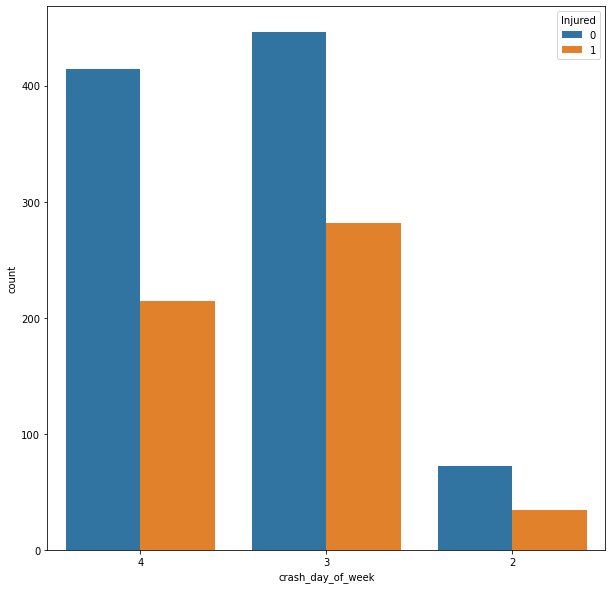

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(x="crash_day_of_week", hue="Injured", data=df)

<AxesSubplot:xlabel='traffic_control_device', ylabel='count'>

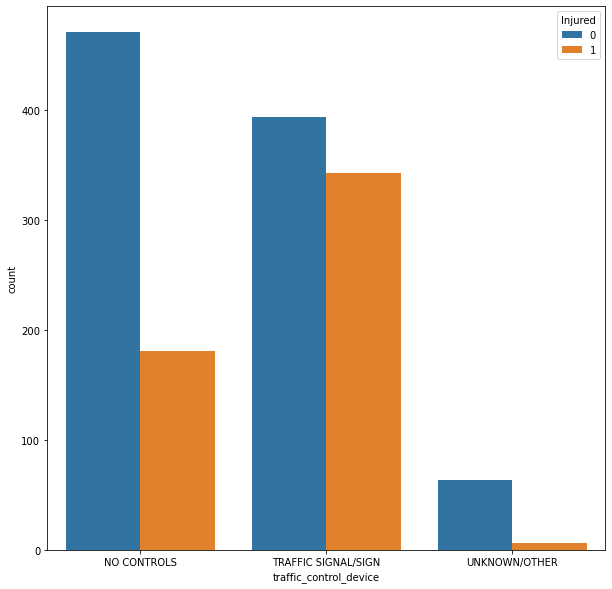

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(x="traffic_control_device", hue="Injured", data=df)

<AxesSubplot:xlabel='first_crash_type', ylabel='count'>

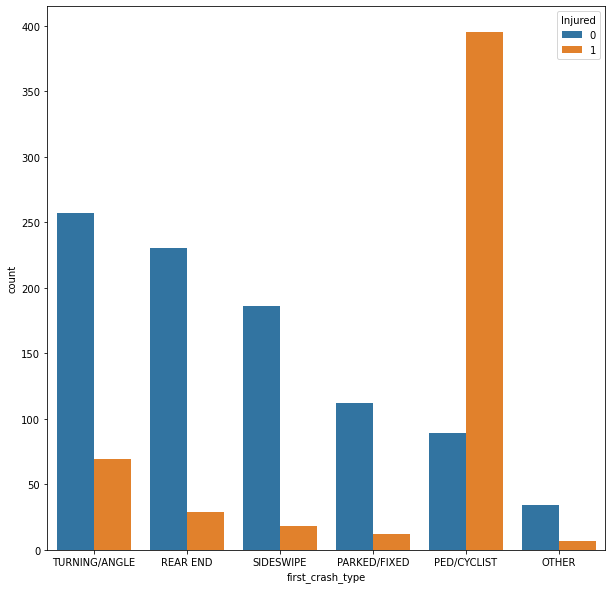

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x="first_crash_type", hue="Injured", data=df)

<AxesSubplot:xlabel='unit_type', ylabel='count'>

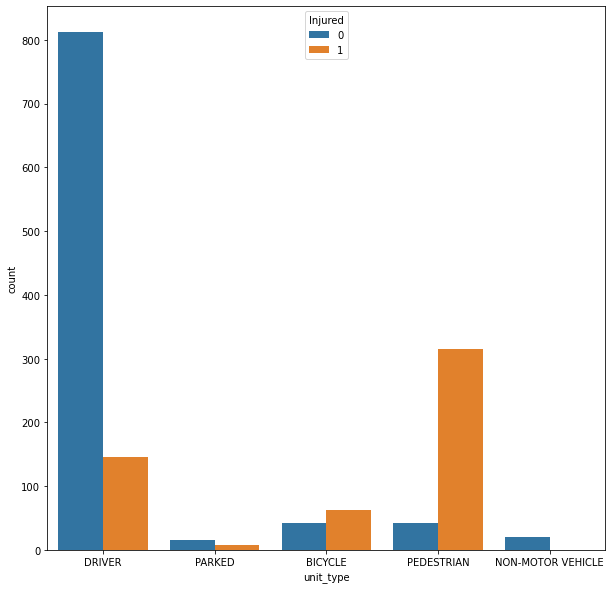

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(x="unit_type", hue="Injured", data=df)

<AxesSubplot:xlabel='time_bins', ylabel='count'>

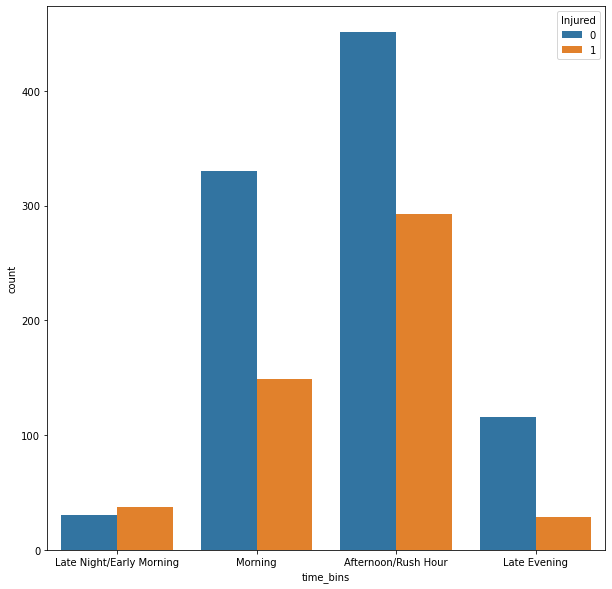

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x="time_bins", hue="Injured", data=df)

<AxesSubplot:xlabel='age_bins', ylabel='count'>

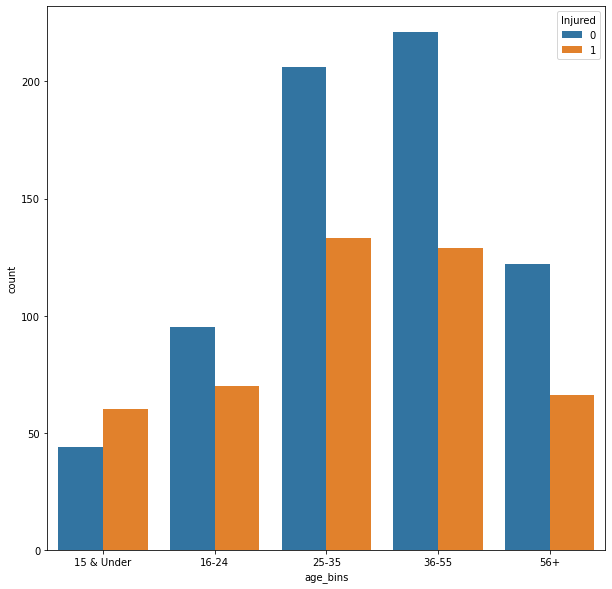

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(x="age_bins", hue="Injured", data=df)

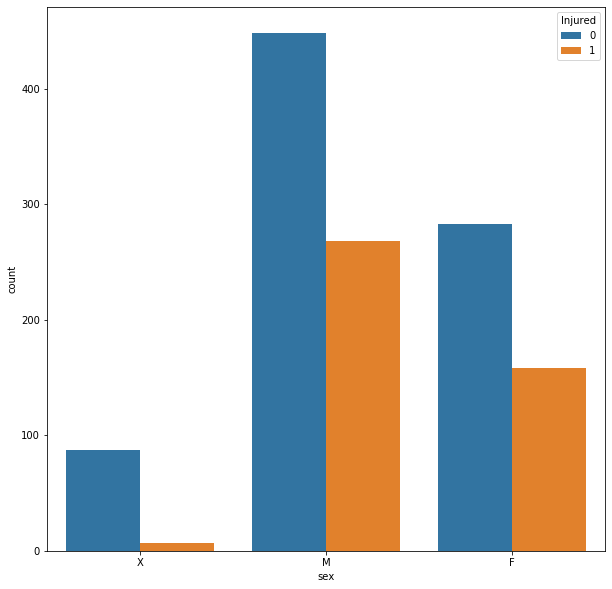

In [96]:
plt.figure(figsize=(10,10))
sns.countplot(x="sex", hue="Injured", data=df)

<AxesSubplot:xlabel='posted_speed', ylabel='count'>

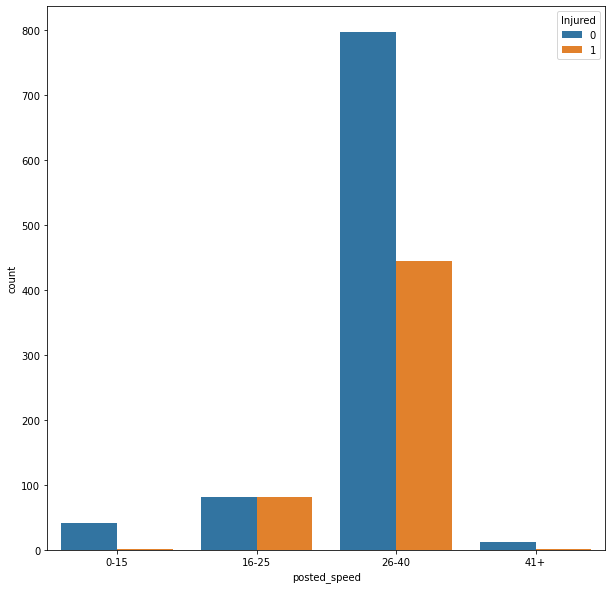

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(x="posted_speed", hue="Injured", data=df)

In [55]:
# reviewing data 
df.describe()

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,beat_of_occurrence,Injured,crash_day_of_week,unit_type,vehicle_type,sex,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,driver_vision,pedpedal_action,pedpedal_visibility,pedpedal_location,time_bins,age_bins,posted_speed
count,1459,1460,1458,1462,1438,1443,1462,1453,1462,1462,1462,1462,979,1440,626,495,1392,979,1241,483,483,483,1435,1146,1462
unique,3,3,2,6,6,7,5,2,213,2,3,5,5,3,23,16,3,3,3,8,4,5,4,5,4
top,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PED/CYCLIST,NOT DIVIDED,DRY,NO DEFECTS,1723,0,3,DRIVER,PASSENGER,M,IL,D,SAFETY EQUIPMENT USED,NOT APPLICABLE/UNKNOWN,UNKNOWN,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN CROSSWALK,Afternoon/Rush Hour,36-55,26-40
freq,737,689,1387,888,484,588,1277,1149,52,932,728,957,607,770,566,413,572,504,640,184,391,207,744,350,1242


## Train-Test-Split


In [56]:
# setting X, y for train-test-split
target = 'Injured'
X = df.drop(columns= target)
y = df[target]

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

## Preprocessing Numerical 

In [57]:
# retrieving list of numeric columns 
num_cols = df.drop(columns=target).select_dtypes('number').columns.tolist()
num_cols

[]

In [58]:
# creating a pipeline 
# SimpleImputer will use the median to fill nulls  
# RobustScaler will use the median to scale 
num_transform = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('scale', RobustScaler())])

## Preprocessing Categorical 

In [59]:
# retrieving list of categorical columns 
cat_cols = df.drop(columns=target).select_dtypes('object').columns.tolist()
cat_cols

['traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'first_crash_type',
 'trafficway_type',
 'roadway_surface_cond',
 'road_defect',
 'beat_of_occurrence',
 'crash_day_of_week',
 'unit_type',
 'vehicle_type',
 'sex',
 'drivers_license_state',
 'drivers_license_class',
 'safety_equipment',
 'airbag_deployed',
 'driver_vision',
 'pedpedal_action',
 'pedpedal_visibility',
 'pedpedal_location']

In [60]:
# creating a pipeline
# SimpleImputer will use strategy 'constant' == 'missing value' input for objects
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
                         ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

## ColumnTransformer

In [61]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [62]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

,traffic_control_device_MISSING,traffic_control_device_NO CONTROLS,traffic_control_device_TRAFFIC SIGNAL/SIGN,traffic_control_device_UNKNOWN/OTHER,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_NOT FUNCTIONING/UNKNOWN,weather_condition_CLEAR,weather_condition_MISSING,weather_condition_RAIN/CLOUDY/OTHER,lighting_condition_DARKNESS,"lighting_condition_DARKNESS, LIGHTED ROAD",lighting_condition_DAWN,lighting_condition_DAYLIGHT,lighting_condition_DUSK,lighting_condition_UNKNOWN,first_crash_type_MISSING,first_crash_type_OTHER,first_crash_type_PARKED/FIXED,first_crash_type_PED/CYCLIST,first_crash_type_REAR END,first_crash_type_SIDESWIPE,first_crash_type_TURNING/ANGLE,trafficway_type_ALLEY/OTHER,trafficway_type_DIVIDED,trafficway_type_FOUR WAY,trafficway_type_MISSING,trafficway_type_NOT DIVIDED,trafficway_type_ONE-WAY,trafficway_type_PARKING LOT,trafficway_type_UNKNOWN,roadway_surface_cond_DRY,roadway_surface_cond_OTHER,roadway_surface_cond_SNOW OR SLUSH,roadway_surface_cond_UNKNOWN,roadway_surface_cond_WET,road_defect_MISSING,road_defect_NO DEFECTS,road_defect_UNKNOWN/OTHER,beat_of_occurrence_1012,beat_of_occurrence_1013,beat_of_occurrence_1021,beat_of_occurrence_1022,beat_of_occurrence_1024,beat_of_occurrence_1031,beat_of_occurrence_1032,beat_of_occurrence_1034,beat_of_occurrence_111,beat_of_occurrence_1111,beat_of_occurrence_1113,beat_of_occurrence_112,beat_of_occurrence_1122,beat_of_occurrence_1124,beat_of_occurrence_1132,beat_of_occurrence_1134,beat_of_occurrence_1135,beat_of_occurrence_114,beat_of_occurrence_121,beat_of_occurrence_1212,beat_of_occurrence_1213,beat_of_occurrence_1214,beat_of_occurrence_1215,beat_of_occurrence_122,beat_of_occurrence_1221,beat_of_occurrence_1223,beat_of_occurrence_1224,beat_of_occurrence_1225,beat_of_occurrence_1231,beat_of_occurrence_1232,beat_of_occurrence_1233,beat_of_occurrence_131,beat_of_occurrence_133,beat_of_occurrence_1411,beat_of_occurrence_1412,beat_of_occurrence_1413,beat_of_occurrence_1414,beat_of_occurrence_1421,beat_of_occurrence_1422,beat_of_occurrence_1423,beat_of_occurrence_1424,beat_of_occurrence_1431,beat_of_occurrence_1432,beat_of_occurrence_1433,beat_of_occurrence_1434,beat_of_occurrence_1513,beat_of_occurrence_1523,beat_of_occurrence_1524,beat_of_occurrence_1531,beat_of_occurrence_1532,beat_of_occurrence_1533,beat_of_occurrence_1611,beat_of_occurrence_1612,beat_of_occurrence_1613,beat_of_occurrence_1614,beat_of_occurrence_1621,beat_of_occurrence_1622,beat_of_occurrence_1623,beat_of_occurrence_1624,beat_of_occurrence_1631,beat_of_occurrence_1632,beat_of_occurrence_1633,beat_of_occurrence_1634,beat_of_occurrence_1650,beat_of_occurrence_1652,beat_of_occurrence_1654,beat_of_occurrence_1711,beat_of_occurrence_1712,beat_of_occurrence_1713,beat_of_occurrence_1722,beat_of_occurrence_1723,beat_of_occurrence_1724,beat_of_occurrence_1731,beat_of_occurrence_1732,beat_of_occurrence_1733,beat_of_occurrence_1812,beat_of_occurrence_1821,beat_of_occurrence_1824,beat_of_occurrence_1831,beat_of_occurrence_1833,beat_of_occurrence_1834,beat_of_occurrence_1911,beat_of_occurrence_1912,beat_of_occurrence_1914,beat_of_occurrence_1915,beat_of_occurrence_1921,beat_of_occurrence_1925,beat_of_occurrence_1931,beat_of_occurrence_1932,beat_of_occurrence_1933,beat_of_occurrence_1934,beat_of_occurrence_1935,beat_of_occurrence_2012,beat_of_occurrence_2013,beat_of_occurrence_2022,beat_of_occurrence_2031,beat_of_occurrence_2032,beat_of_occurrence_2033,beat_of_occurrence_212,beat_of_occurrence_213,beat_of_occurrence_221,beat_of_occurrence_2211,beat_of_occurrence_2212,beat_of_occurrence_2213,beat_of_occurrence_222,beat_of_occurrence_2221,beat_of_occurrence_2222,beat_of_occurrence_223,beat_of_occurrence_2232,beat_of_occurrence_2233,beat_of_occurrence_2234,beat_of_occurrence_224,beat_of_occurrence_225,beat_of_occurrence_231,beat_of_occurrence_233,beat_of_occurrence_234,beat_of_occurrence_235,beat_of_occurrence_2411,beat_of_occurrence_2412,beat_of_occurre

## Class Imbalance (SMOTE)

In [63]:
# observing y_train(classes) count 
y_train.value_counts(normalize=True)

0    0.635949
1    0.364051
Name: Injured, dtype: float64

In [64]:
# # Using the SMOTE procedure to solve class imbalance problems 
# X_train_tf, y_train = SMOTE().fit_resample(X_train_tf, y_train)

In [65]:
# # reviewing SMOTE has been implemented 
# pd.Series(y_train).value_counts()

# Modeling

## Logistic Regression 

In [90]:
# instantiate LogisticRegression 
log_reg = LogisticRegression()

### log_reg Vanilla Model 

In [91]:
# fit the model 
log_reg.fit(X_train_tf, y_train)

# predict
y_pred = log_reg.predict(X_test_tf)

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       637
           1       0.97      0.84      0.90       329

    accuracy                           0.94       966
   macro avg       0.95      0.91      0.93       966
weighted avg       0.94      0.94      0.94       966



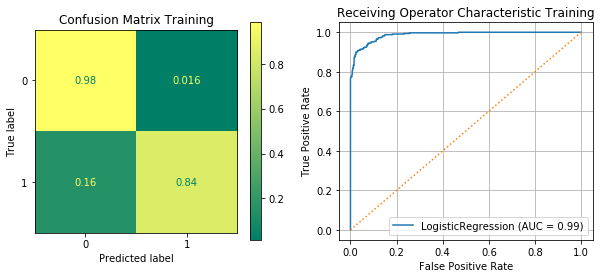

------------------------------------------------------------
Logistic Regression CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       201
           1       0.94      0.78      0.85       122

    accuracy                           0.90       323
   macro avg       0.91      0.87      0.89       323
weighted avg       0.90      0.90      0.90       323



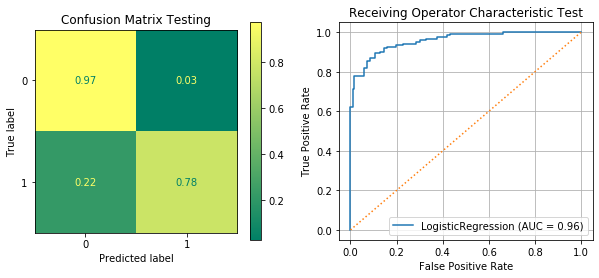

In [62]:
# classification report using function 
evaluate_classification(log_reg,X_train_tf, X_test_tf, y_train, y_test, label = "Logistic Regression")

## KNN Model 

In [85]:
# instantiate KneighborsClassifier 
knn_clf = KNeighborsClassifier()

### knn_clf Vanilla Model 

In [92]:
# fit the model 
knn_clf.fit(X_train_tf, y_train)

# predict
y_pred = knn_clf.predict(X_test_tf)

------------------------------------------------------------
KNN CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       697
           1       0.96      0.85      0.90       399

    accuracy                           0.93      1096
   macro avg       0.94      0.92      0.93      1096
weighted avg       0.94      0.93      0.93      1096



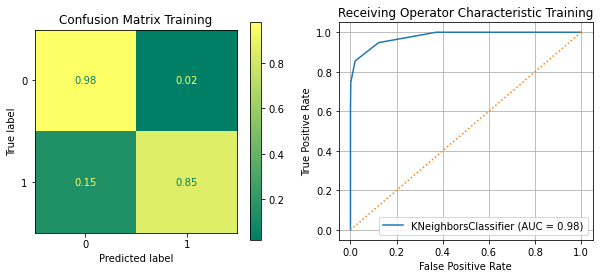

------------------------------------------------------------
KNN CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       235
           1       0.90      0.80      0.85       131

    accuracy                           0.90       366
   macro avg       0.90      0.88      0.88       366
weighted avg       0.90      0.90      0.89       366



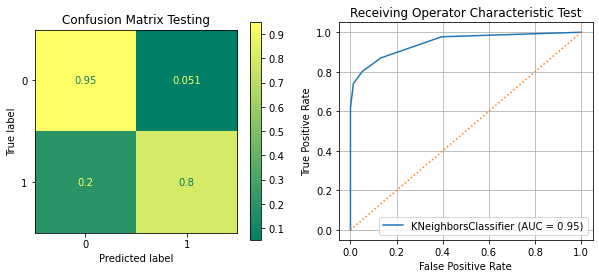

In [93]:
# classification report using function 
evaluate_classification(knn_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'KNN')

## Decision Tree

In [73]:
# instantiate DecisionTreeClassifier 
tree_clf = DecisionTreeClassifier()

### tree_clf Vanilla Model 

In [74]:
# fit the model  
tree_clf.fit(X_train_tf, y_train)

# predict 
y_pred = tree_clf.predict(X_test_tf)

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      0.99      1.00       329

    accuracy                           1.00       966
   macro avg       1.00      1.00      1.00       966
weighted avg       1.00      1.00      1.00       966



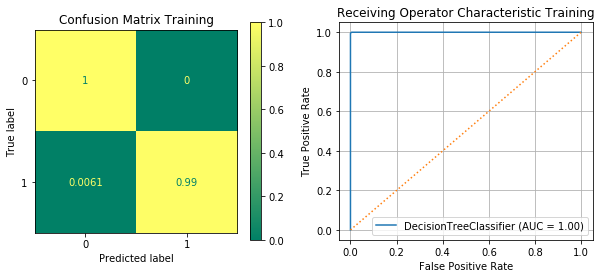

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       201
           1       0.86      0.88      0.87       122

    accuracy                           0.90       323
   macro avg       0.89      0.90      0.89       323
weighted avg       0.90      0.90      0.90       323



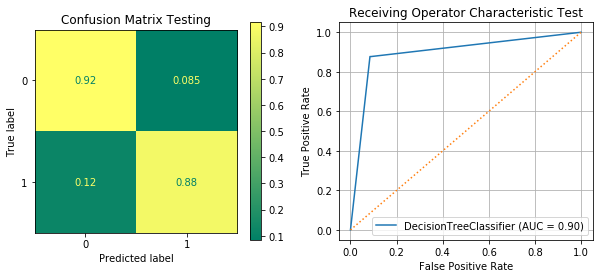

In [73]:
# classification report using function 
evaluate_classification(tree_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'Decision Tree')

### tree_clf GridsearchCV

In [75]:
# create params_grid for DecisionTreeClassifier  
params_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

# create grid search 
grid = GridSearchCV(tree_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       637
           1       1.00      0.94      0.97       329

    accuracy                           0.98       966
   macro avg       0.99      0.97      0.98       966
weighted avg       0.98      0.98      0.98       966



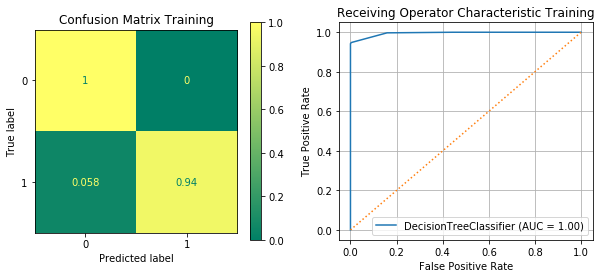

------------------------------------------------------------
Decision Tree CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       201
           1       0.91      0.82      0.86       122

    accuracy                           0.90       323
   macro avg       0.90      0.88      0.89       323
weighted avg       0.90      0.90      0.90       323



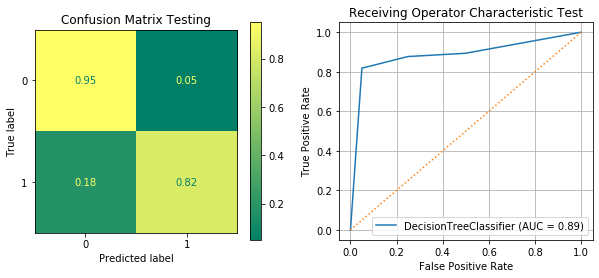

In [75]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Decision Tree')

## Bagged Trees 

In [77]:
# instantiate Bagging + DecisionTreeClassifier  
bag_clf = BaggingClassifier(base_estimator=RandomForestClassifier())

### bag_clf Vanilla Model 

In [78]:
# fit the model  
bag_clf.fit(X_train_tf, y_train)

# predict
y_pred = bag_clf.predict(X_test_tf)

------------------------------------------------------------
Bagged Trees CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       637
           1       1.00      0.95      0.98       329

    accuracy                           0.98       966
   macro avg       0.99      0.98      0.98       966
weighted avg       0.98      0.98      0.98       966



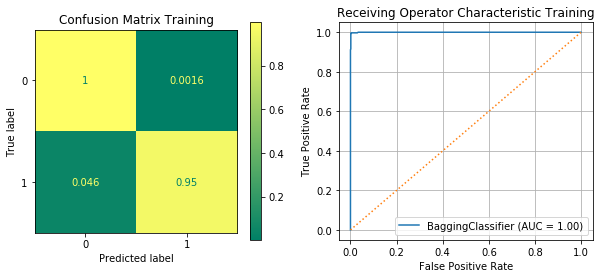

------------------------------------------------------------
Bagged Trees CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       201
           1       0.98      0.70      0.81       122

    accuracy                           0.88       323
   macro avg       0.91      0.84      0.86       323
weighted avg       0.89      0.88      0.87       323



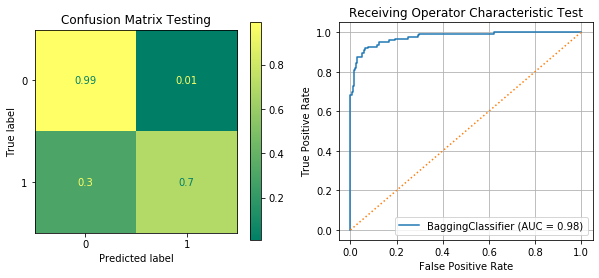

In [78]:
# classification report using function 
evaluate_classification(bag_clf, X_train_tf, X_test_tf, y_train, y_test, label = 'Bagged Trees')

### bag_clf GridsearchCV

In [79]:
# create params_grid for BaggingClassifier
params_grid = {'bootstrap': [True, False],
               'bootstrap_features': [True, False],    
               'n_estimators': [5, 10, 15],
               #'max_samples' : [0.6, 0.8, 1.0],
               'base_estimator__criterion': ['gini', 'entropy'],    
               'base_estimator__max_depth': [1, 5, 10, 15, None]}

# create grid search 
grid = GridSearchCV(bag_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'bootstrap': False,
 'bootstrap_features': False,
 'n_estimators': 5}

------------------------------------------------------------
Bagged Trees CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      1.00      1.00       329

    accuracy                           1.00       966
   macro avg       1.00      1.00      1.00       966
weighted avg       1.00      1.00      1.00       966



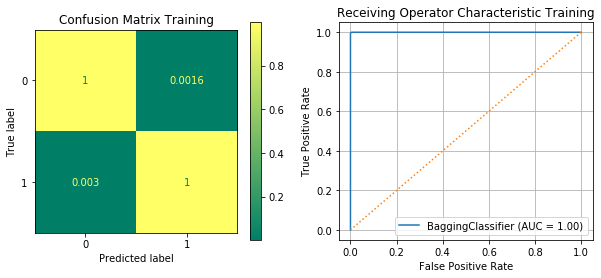

------------------------------------------------------------
Bagged Trees CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       201
           1       0.97      0.73      0.83       122

    accuracy                           0.89       323
   macro avg       0.91      0.86      0.87       323
weighted avg       0.90      0.89      0.88       323



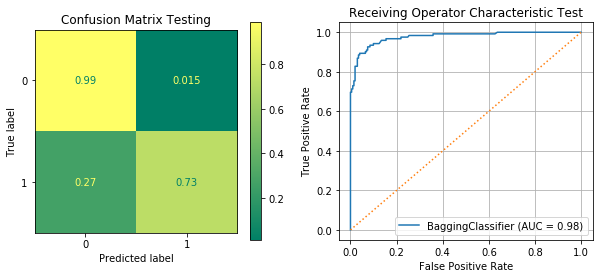

In [80]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Bagged Trees')

## Random Forest 

In [80]:
# instantiate RandomForestClassifier  
forest_clf = RandomForestClassifier()

### forest_clf Vanilla Model 

In [81]:
# fit the model 
forest_clf.fit(X_train_tf, y_train)

# get prediction 
y_pred = forest_clf.predict(X_test_tf)

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      1.00      1.00       329

    accuracy                           1.00       966
   macro avg       1.00      1.00      1.00       966
weighted avg       1.00      1.00      1.00       966



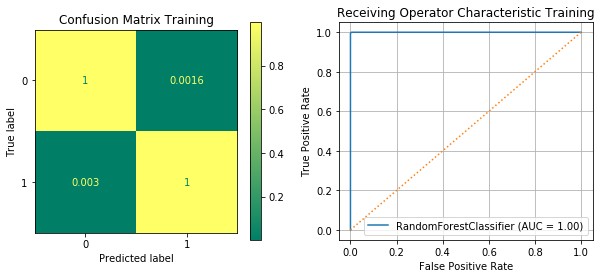

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       201
           1       0.97      0.73      0.83       122

    accuracy                           0.89       323
   macro avg       0.91      0.86      0.87       323
weighted avg       0.90      0.89      0.88       323



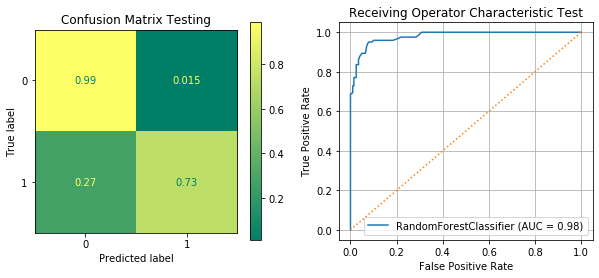

In [83]:
# classification report using function 
evaluate_classification(forest_clf,X_train_tf, X_test_tf, y_train, y_test, label = 'Random Forest')

### forest_clf GridsearchCV

In [82]:
# create params_grid for RandomForestClassifier 
params_grid = {'criterion': ['gini', 'entropy'],   
              'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# create grid search 
grid = GridSearchCV(forest_clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       1.00      1.00      1.00       399

    accuracy                           1.00      1096
   macro avg       1.00      1.00      1.00      1096
weighted avg       1.00      1.00      1.00      1096



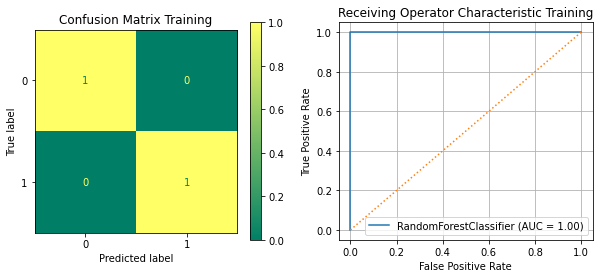

------------------------------------------------------------
Random Forest CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       235
           1       0.97      0.86      0.91       131

    accuracy                           0.94       366
   macro avg       0.95      0.92      0.93       366
weighted avg       0.94      0.94      0.94       366



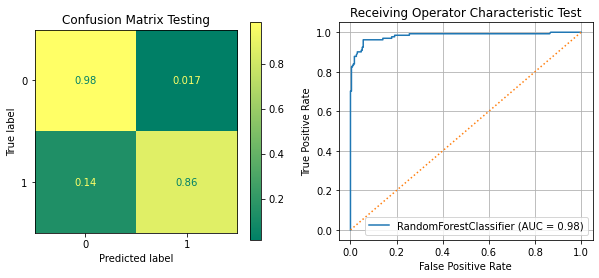

In [94]:
# classification report using function
evaluate_classification(grid.best_estimator_, X_train_tf, X_test_tf, y_train, y_test, 
                        label='Random Forest')

In [86]:
best_clf = grid.best_estimator_

# Analysis of the Models and Interpretation

* Performance Advantage: The Random Forest Classifier, with an accuracy rate of 89%, stood out among other models considered.      Its performance either matched or surpassed alternatives.

* Generalization and Overfitting Mitigation: The decision to favor the Random Forest model was influenced by its inability to      achieve 100% accuracy on the training set. This indicates a beneficial level of generalization and a reduced risk of             overfitting.
* In addition, the results suggest that your Random Forest model is performing exceptionally well on the training data, with         perfect precision, recall, and F1-score for both classes. 
* This high level of accuracy indicates a strong ability to generalize patterns in the training set. 

In [87]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

,traffic_control_device_MISSING,traffic_control_device_NO CONTROLS,traffic_control_device_TRAFFIC SIGNAL/SIGN,traffic_control_device_UNKNOWN/OTHER,device_condition_FUNCTIONING PROPERLY,device_condition_MISSING,device_condition_NO CONTROLS,device_condition_NOT FUNCTIONING/UNKNOWN,weather_condition_CLEAR,weather_condition_MISSING,weather_condition_RAIN/CLOUDY/OTHER,lighting_condition_DARKNESS,"lighting_condition_DARKNESS, LIGHTED ROAD",lighting_condition_DAWN,lighting_condition_DAYLIGHT,lighting_condition_DUSK,lighting_condition_UNKNOWN,first_crash_type_MISSING,first_crash_type_OTHER,first_crash_type_PARKED/FIXED,first_crash_type_PED/CYCLIST,first_crash_type_REAR END,first_crash_type_SIDESWIPE,first_crash_type_TURNING/ANGLE,trafficway_type_ALLEY/OTHER,trafficway_type_DIVIDED,trafficway_type_FOUR WAY,trafficway_type_MISSING,trafficway_type_NOT DIVIDED,trafficway_type_ONE-WAY,trafficway_type_PARKING LOT,trafficway_type_UNKNOWN,roadway_surface_cond_DRY,roadway_surface_cond_OTHER,roadway_surface_cond_UNKNOWN,roadway_surface_cond_WET,road_defect_MISSING,road_defect_NO DEFECTS,road_defect_UNKNOWN/OTHER,hit_and_run_i_MISSING,hit_and_run_i_N,hit_and_run_i_Y,beat_of_occurrence_1012,beat_of_occurrence_1013,beat_of_occurrence_1014,beat_of_occurrence_1022,beat_of_occurrence_1023,beat_of_occurrence_1024,beat_of_occurrence_1031,beat_of_occurrence_1034,beat_of_occurrence_111,beat_of_occurrence_1111,beat_of_occurrence_1112,beat_of_occurrence_1113,beat_of_occurrence_1114,beat_of_occurrence_1121,beat_of_occurrence_1122,beat_of_occurrence_1123,beat_of_occurrence_1124,beat_of_occurrence_113,beat_of_occurrence_1131,beat_of_occurrence_1132,beat_of_occurrence_1133,beat_of_occurrence_1135,beat_of_occurrence_114,beat_of_occurrence_1211,beat_of_occurrence_1214,beat_of_occurrence_1215,beat_of_occurrence_122,beat_of_occurrence_1221,beat_of_occurrence_1223,beat_of_occurrence_1224,beat_of_occurrence_1225,beat_of_occurrence_123,beat_of_occurrence_1231,beat_of_occurrence_1232,beat_of_occurrence_1235,beat_of_occurrence_124,beat_of_occurrence_131,beat_of_occurrence_132,beat_of_occurrence_1411,beat_of_occurrence_1414,beat_of_occurrence_1424,beat_of_occurrence_1432,beat_of_occurrence_1433,beat_of_occurrence_1511,beat_of_occurrence_1512,beat_of_occurrence_1513,beat_of_occurrence_1522,beat_of_occurrence_1533,beat_of_occurrence_1611,beat_of_occurrence_1612,beat_of_occurrence_1613,beat_of_occurrence_1622,beat_of_occurrence_1623,beat_of_occurrence_1624,beat_of_occurrence_1631,beat_of_occurrence_1632,beat_of_occurrence_1651,beat_of_occurrence_1654,beat_of_occurrence_1711,beat_of_occurrence_1712,beat_of_occurrence_1713,beat_of_occurrence_1722,beat_of_occurrence_1723,beat_of_occurrence_1724,beat_of_occurrence_1731,beat_of_occurrence_1732,beat_of_occurrence_1811,beat_of_occurrence_1812,beat_of_occurrence_1813,beat_of_occurrence_1814,beat_of_occurrence_1822,beat_of_occurrence_1823,beat_of_occurrence_1824,beat_of_occurrence_1832,beat_of_occurrence_1833,beat_of_occurrence_1834,beat_of_occurrence_1911,beat_of_occurrence_1912,beat_of_occurrence_1913,beat_of_occurrence_1921,beat_of_occurrence_1922,beat_of_occurrence_1924,beat_of_occurrence_1925,beat_of_occurrence_1931,beat_of_occurrence_1933,beat_of_occurrence_1934,beat_of_occurrence_1935,beat_of_occurrence_2011,beat_of_occurrence_2012,beat_of_occurrence_2022,beat_of_occurrence_2023,beat_of_occurrence_2032,beat_of_occurrence_211,beat_of_occurrence_212,beat_of_occurrence_214,beat_of_occurrence_215,beat_of_occurrence_2211,beat_of_occurrence_2212,beat_of_occurrence_2213,beat_of_occurrence_222,beat_of_occurrence_2221,beat_of_occurrence_2222,beat_of_occurrence_2223,beat_of_occurrence_223,beat_of_occurrence_2232,beat_of_occurrence_2233,beat_of_occurrence_2234,beat_of_occurrence_224,beat_of_occurrence_225,beat_of_occurrence_233,beat_of_occurrence_2411,beat_of_occurrence_2412,beat_of_occurrence_2413,beat_of_occurrence_2422,beat_of_occurrence_2423,beat_of_occurrence_2424,beat_of_occurrence_2431,beat_of_occurrence_2432,beat_of_occurrence_

In [ ]:
importance = pd.Series(best_clf.feature_importances_ ,index=X_train_tf.columns)
importance.sort_values().tail(20).plot(kind='barh', figsize=(10,10), title = 'Feature Importance')

> ## Observation: 
   * The features "Ped/Cyclist," "driver," and "pedestrians" exhibit notable significance in predicting injuries or accidents, as indicated by their highest coefficients. Within the model, the heightened coefficient associated with "Ped/Cyclist" implies that incidents involving pedestrians or cyclists play a substantial role in shaping predictions related to injuries or accidents. Similarly, the prominence of the "driver" feature's coefficient suggests a significant impact of incidents involving drivers on the model's predictive outcomes.

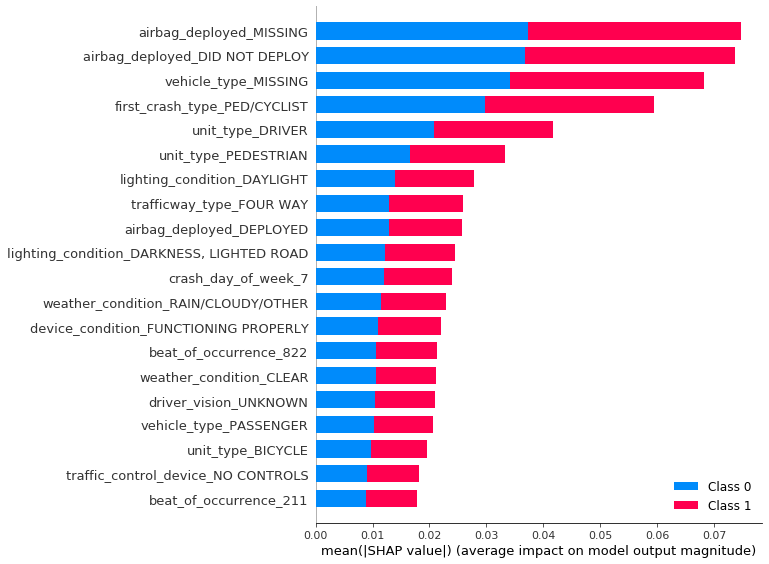

In [89]:
X_shap = shap.sample(X_train_tf,20)
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap, plot_type="bar")

> **Observations:**
   * Most features have a 50/50 split with who is injured or not injured 
   * Missing information on type of vehicle involved 
   * Missing information on if airbag deployed or not 

# Conclusion 

* Based on my classification model, the type of accidents that appears to occur most frequently is drivers colliding with pedestrians or cyclists on the street.
* Analyzing the data indicates that pedestrians typically do not wear contrasting or reflective clothing, and the majority of accidents take place in the afternoon or during rush hour.
* Furthermore, my findings reveal that a significant number of accidents occur in speed limit zones labeled between 30-40 mph.
# Recommendations:
* Pedestrians and cyclists should heighten their awareness and wear contrasting colors, particularly during rush hour.
* To enhance safety, the city can implement measures such as increasing the number of traffic signs and creating lanes that are     more accommodating for pedestrians and cyclists.
* Additionally, considering the higher frequency of accidents during the afternoon and rush hour, the city might consider           lowering speed limits during these times or implementing increased patrols in zones with speed limits ranging from 30 to 40     mph.